In [1]:
## Here are the all required libraries 
import os
import cv2
import numpy as np
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras import layers, models

Loading Data

In [2]:
main_folder_path = "D:\AI_Decision_Sciences_EndTerm"

In [3]:
images = []  # List to store the images
labels = []  # List to store the corresponding labels

# Loop over the subfolders in the main folder
for label, subfolder in enumerate(os.listdir(main_folder_path)):
    subfolder_path = os.path.join(main_folder_path, subfolder)
    if os.path.isdir(subfolder_path):
        # Loop over the files in the subfolder
        for filename in os.listdir(subfolder_path):
            img_path = os.path.join(subfolder_path, filename)
            if os.path.isfile(img_path):
                img = cv2.imread(img_path)  # Read the image file
                img = cv2.resize(img, (128, 128))  # Resize the image to 128x128 pixels
                img = img.astype(np.float32) / 255.0  # Convert image to float32 and normalize pixel values
                images.append(img)  # Add the image to the list
                labels.append(label)  # Add the corresponding label to the list


In [4]:
images = np.array(images)
labels = np.array(labels)
print(labels)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5
  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5

In [5]:
np.savez('image_dataset.npz', images=images, labels=labels)  # Save the images and labels as a NumPy compressed archive


# - The 'np.savez' function is used to save the images and labels as a NumPy compressed archive.
# - The archive will be saved with the filename 'image_dataset.npz'.
# - The 'images' and 'labels' are provided as keyword arguments to specify the arrays to be saved.
# - This line effectively saves the data for later use or distribution.


In [6]:
# Load the image dataset
data = np.load('image_dataset.npz')

images = data['images']  # Load the images from the dataset
labels = data['labels']  # Load the labels from the dataset

# Split the dataset into train and test sets
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.10, random_state=777)

# Split the train set further into train and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.15, random_state=77)

# - Loads the image dataset from the 'image_dataset.npz' file using the 'np.load' function.
# - The images and labels are loaded into separate variables from the loaded dataset.
# - The dataset is then split into train and test sets using the 'train_test_split' function.
# - The test set will contain 20% of the original dataset, while the train set will contain 80%.
# - Next, the train set is further split into train and validation sets using the same function.
# - The validation set will contain 15% of the train set, while the train set will contain the remaining 85%.
# - The random_state parameter ensures reproducibility of the splits.

In [7]:
(x_train, _) = train_images, train_labels  # Assign the train images and labels to x_train
(x_val, _) = val_images, val_labels  # Assign the validation images and labels to x_val
(x_test, _) = test_images, test_labels  # Assign the test images and labels to x_test

print(x_train.shape, x_test.shape, x_val.shape)  # Print the shapes of the train, test, and validation sets


# - The underscore (_) is used as a placeholder to disregard the train labels, as they are not needed in this code snippet.



(534, 128, 128, 3) (70, 128, 128, 3) (95, 128, 128, 3)


 Flattening our data

In [8]:
## Flattening our data:-x_train,x_test,x_val
x_train = x_train.reshape(x_train.shape[0], np.prod(x_train.shape[1:]))
x_val = x_val.reshape(x_val.shape[0], np.prod(x_val.shape[1:]))
x_test = x_test.reshape(x_test.shape[0], np.prod(x_test.shape[1:]))

print (x_train.shape)
print (x_val.shape)
print (x_test.shape)

(534, 49152)
(95, 49152)
(70, 49152)


Building AutoEncoder

In [33]:
# The size of encoded and actual representations
encoding_dim = 256
actual_dim = x_train.shape[1]
actual_dim

49152

In [39]:
# Input layer
input_img = Input(shape=(actual_dim,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(actual_dim, activation='sigmoid')(encoded)


# - The input shape is specified as (actual_dim,), where actual_dim represents the number of features in the input data.
# - The input_img variable represents the input to the autoencoder.
# - The encoded variable represents the encoded representation of the input.
# - A Dense layer is used with the activation function 'relu' to perform the encoding operation.
# - The encoding_dim specifies the number of units/neurons in the encoding layer.
# - The decoded variable represents the lossy reconstruction of the input.
# - Another Dense layer is used with the activation function 'sigmoid' to perform the decoding operation.
# - The actual_dim is used as the number of units/neurons in the decoding layer to reconstruct the input data.


In [40]:
# This model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# Explanation:
# - The autoencoder model is created using the Model class from Keras.
# - The input to the model is specified as input_img, which represents the original input data.
# - The output of the model is specified as decoded, which represents the reconstructed output.
# - The autoencoder model maps an input to its reconstruction by connecting the input_img and decoded layers.
# - This means that the autoencoder model takes the input_img as input and produces the reconstructed output as the output.

print(autoencoder.summary())
# - This summary can be helpful for understanding the overall structure of the autoencoder model and checking if it matches the intended design.

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 49152)]           0         
                                                                 
 dense_6 (Dense)             (None, 256)               12583168  
                                                                 
 dense_7 (Dense)             (None, 49152)             12632064  
                                                                 
Total params: 25,215,232
Trainable params: 25,215,232
Non-trainable params: 0
_________________________________________________________________
None


After defining each layer, we build a model using modelAPI by connecting the start and end layers.

**Create a separate encoder model:**

In [41]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)
print(encoder.summary())

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 49152)]           0         
                                                                 
 dense_6 (Dense)             (None, 256)               12583168  
                                                                 
Total params: 12,583,168
Trainable params: 12,583,168
Non-trainable params: 0
_________________________________________________________________
None


**Create a separate decoder model**

In [42]:
print("All_Layer:",autoencoder.layers)
print("Dense:",autoencoder.layers[-1])

All_Layer: [<keras.engine.input_layer.InputLayer object at 0x0000018681067FA0>, <keras.layers.core.dense.Dense object at 0x0000018681067D60>, <keras.layers.core.dense.Dense object at 0x0000018681067B20>]
Dense: <keras.layers.core.dense.Dense object at 0x0000018681067B20>


In [43]:
# Create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1](encoded_input)
# Create the decoder model
decoder = Model(encoded_input, decoder_layer)
# Explanation:
# - It creates a placeholder for an encoded input with a shape of (encoding_dim,).
# - The encoded_input variable will serve as the input to the decoder model.
# - The shape (encoding_dim,) indicates that the encoded input has a dimensionality of encoding_dim.
# - The decoder_layer variable retrieves the last layer of the autoencoder model.
# - The autoencoder.layers[-1] syntax is used to access the last layer of the autoencoder model.
# - The decoder_layer represents the output layer of the decoder.
# - The Model function is used to define the decoder model, specifying the input layer (encoded_input) and the output layer (decoder_layer).
# - The resulting decoder model can be used to generate outputs based on encoded inputs.


In [44]:
decoder_layer
print(decoder.summary())

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 256)]             0         
                                                                 
 dense_7 (Dense)             (None, 49152)             12632064  
                                                                 
Total params: 12,632,064
Trainable params: 12,632,064
Non-trainable params: 0
_________________________________________________________________
None


**Configuring the autoencoder model to use a per-pixel mean_squared_error loss, and the Adam optimizer:**

In [45]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

Finally, we compile the model by mentioning the loss function, optimizer and the error metric to use.

**Train our autoencoder for 50 epochs:**

In [46]:
history = autoencoder.fit(x_train, x_train,
                epochs=25,
                batch_size=40,
                shuffle=True,
                validation_data=(x_val, x_val))

# Explanation:
# - It trains the autoencoder model using the fit() function.
# - The input data for training and validation are both x_train and x_train, representing the original input images.
# - The autoencoder is trained to reconstruct the input images as close as possible.
# - The shuffle parameter is set to True, which randomly shuffles the training data at each epoch to introduce randomness.
# - This object can be used to analyze and visualize the training history, including the loss and metrics over the epochs.


Epoch 1/25


14/14 [==============================] - 8s 456ms/step - loss: 0.0533 - val_loss: 0.0309
Epoch 2/25
14/14 [==============================] - 6s 421ms/step - loss: 0.0322 - val_loss: 0.0308
Epoch 3/25
14/14 [==============================] - 5s 391ms/step - loss: 0.0276 - val_loss: 0.0230
Epoch 4/25
14/14 [==============================] - 5s 382ms/step - loss: 0.0220 - val_loss: 0.0196
Epoch 5/25
14/14 [==============================] - 6s 398ms/step - loss: 0.0184 - val_loss: 0.0168
Epoch 6/25
14/14 [==============================] - 6s 396ms/step - loss: 0.0162 - val_loss: 0.0153
Epoch 7/25
14/14 [==============================] - 6s 404ms/step - loss: 0.0149 - val_loss: 0.0141
Epoch 8/25
14/14 [==============================] - 6s 413ms/step - loss: 0.0139 - val_loss: 0.0133
Epoch 9/25
14/14 [==============================] - 6s 404ms/step - loss: 0.0130 - val_loss: 0.0124
Epoch 10/25
14/14 [==============================] - 5s 375ms/step - loss: 0.0119 - val_loss: 0.0116
Epoch 11/2

Plot between Training and Validation Loss

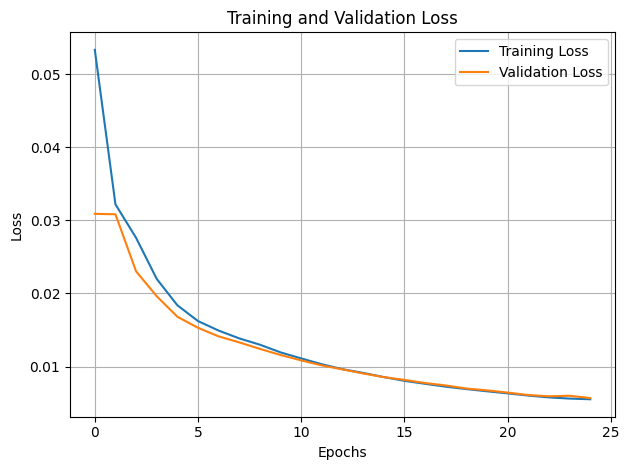

In [47]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

# Set plot title and labels
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Add grid lines
plt.grid(True)

# Add legend and display the plot
plt.legend()
plt.tight_layout()
plt.show()


**Visualize the reconstructed inputs and the encoded representations for test images using Matplotlib.**

In [48]:
encoded_imgs = encoder.predict(x_test)  # Generate encoded representations for the test set
decoded_imgs = decoder.predict(encoded_imgs)  # Generate decoded images from the encoded representations

print(encoded_imgs[1].shape)
print(decoded_imgs[1].shape)

# Comments:
# - It uses the trained encoder model to generate encoded representations for the test set.
# - The encoder.predict() function takes the input x_test and produces the corresponding encoded representations.
# - The encoded_imgs variable stores the generated encoded representations.
# - Next, the code uses the trained decoder model to generate decoded images from the encoded representations.
# - The decoder.predict() function takes the encoded_imgs as input and produces the corresponding decoded images.
# - The decoded_imgs variable stores the generated decoded images.
# - By encoding and then decoding the test set, this code allows for evaluating the reconstruction quality of the autoencoder.


3/3 [==============================] - 0s 10ms/step
(256,)
(49152,)


Original and Reconstructed Image 

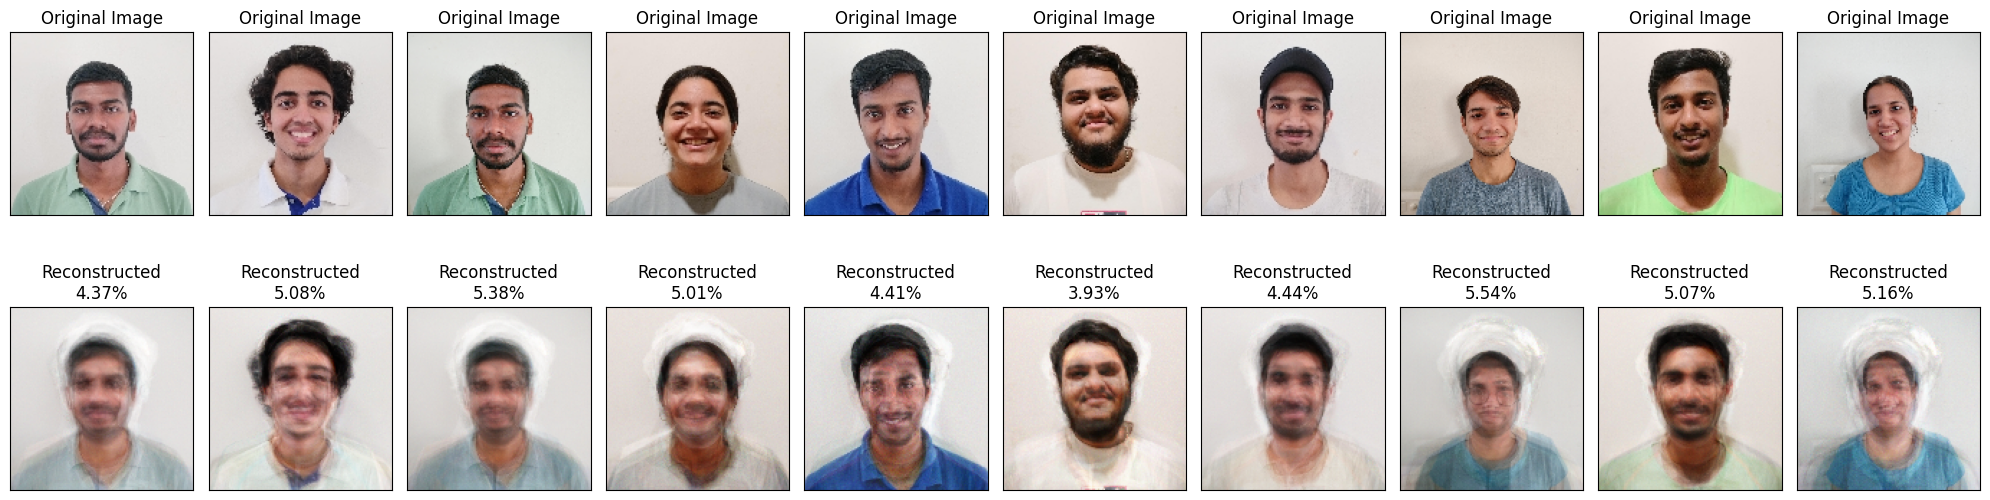

In [49]:
n = 10  # how many images we will display
plt.figure(figsize=(20, 6))

for i in range(n):
    # Calculate percentage of reconstruction
    percentage_reconstruction = np.mean(np.abs(x_test[i] - decoded_imgs[i])) * 100

    # Display original image
    ax = plt.subplot(2, n, i + 1)
    img = x_test[i].reshape(128, 128, 3)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title('Original Image')

    # Display reconstructed image
    ax = plt.subplot(2, n, i + 1 + n)
    img = decoded_imgs[i].reshape(128, 128, 3)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title(f'Reconstructed\n{percentage_reconstruction:.2f}%')

plt.tight_layout()
plt.show()


Classification Model
- Here we are using Classification model to classifiy images with in Classification model we are uisng  sparse_categorical_crossentropy loss, and the Adam optimizer

In [21]:

# Create a new model for classification
classification_encoder = models.Model(autoencoder.input, autoencoder.layers[1].output)
classification_encoder.trainable = False

classification_model = models.Sequential()
classification_model.add(classification_encoder)
classification_model.add(layers.Dense(12, activation='softmax'))  # Assuming 12 different people
classification_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the classification model
history = classification_model.fit(x_train, train_labels, epochs=50, batch_size=32,validation_data = (x_val, val_labels))

prediction = classification_model.predict(x_test)

prediction.shape

Epoch 1/50
17/17 [==============================] - 1s 25ms/step - loss: 11.7802 - accuracy: 0.1180 - val_loss: 8.5679 - val_accuracy: 0.0947
Epoch 2/50
17/17 [==============================] - 0s 18ms/step - loss: 7.5845 - accuracy: 0.0899 - val_loss: 5.9620 - val_accuracy: 0.0737
Epoch 3/50
17/17 [==============================] - 0s 18ms/step - loss: 5.2777 - accuracy: 0.1124 - val_loss: 4.5814 - val_accuracy: 0.1368
Epoch 4/50
17/17 [==============================] - 0s 18ms/step - loss: 4.0702 - accuracy: 0.1891 - val_loss: 3.8733 - val_accuracy: 0.1789
Epoch 5/50
17/17 [==============================] - 0s 19ms/step - loss: 3.4110 - accuracy: 0.2322 - val_loss: 3.2959 - val_accuracy: 0.2000
Epoch 6/50
17/17 [==============================] - 0s 19ms/step - loss: 2.9082 - accuracy: 0.2584 - val_loss: 2.8796 - val_accuracy: 0.2421
Epoch 7/50
17/17 [==============================] - 0s 18ms/step - loss: 2.4766 - accuracy: 0.2996 - val_loss: 2.4574 - val_accuracy: 0.3053
Epoch 8/50
1

(70, 12)

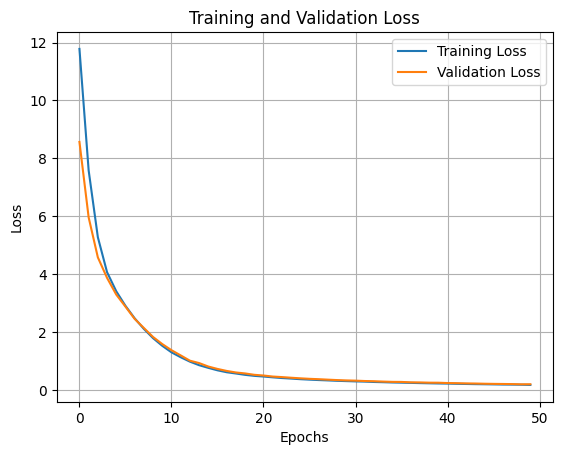

In [22]:
# Plot the training and validation loss curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
# Mapping of class labels to corresponding names
names = {
    0: "Abhay",
    1: "Atif",
    2: "Bhanu",
    3: "Dhwani",
    4: "Hashika",
    5: "Mustafa",
    6: "Prasad",
    7: "Rahul",
    8: "Salman",
    9: "Shivansh",
    10: "Swag",
    11: "Yugandhar"
}

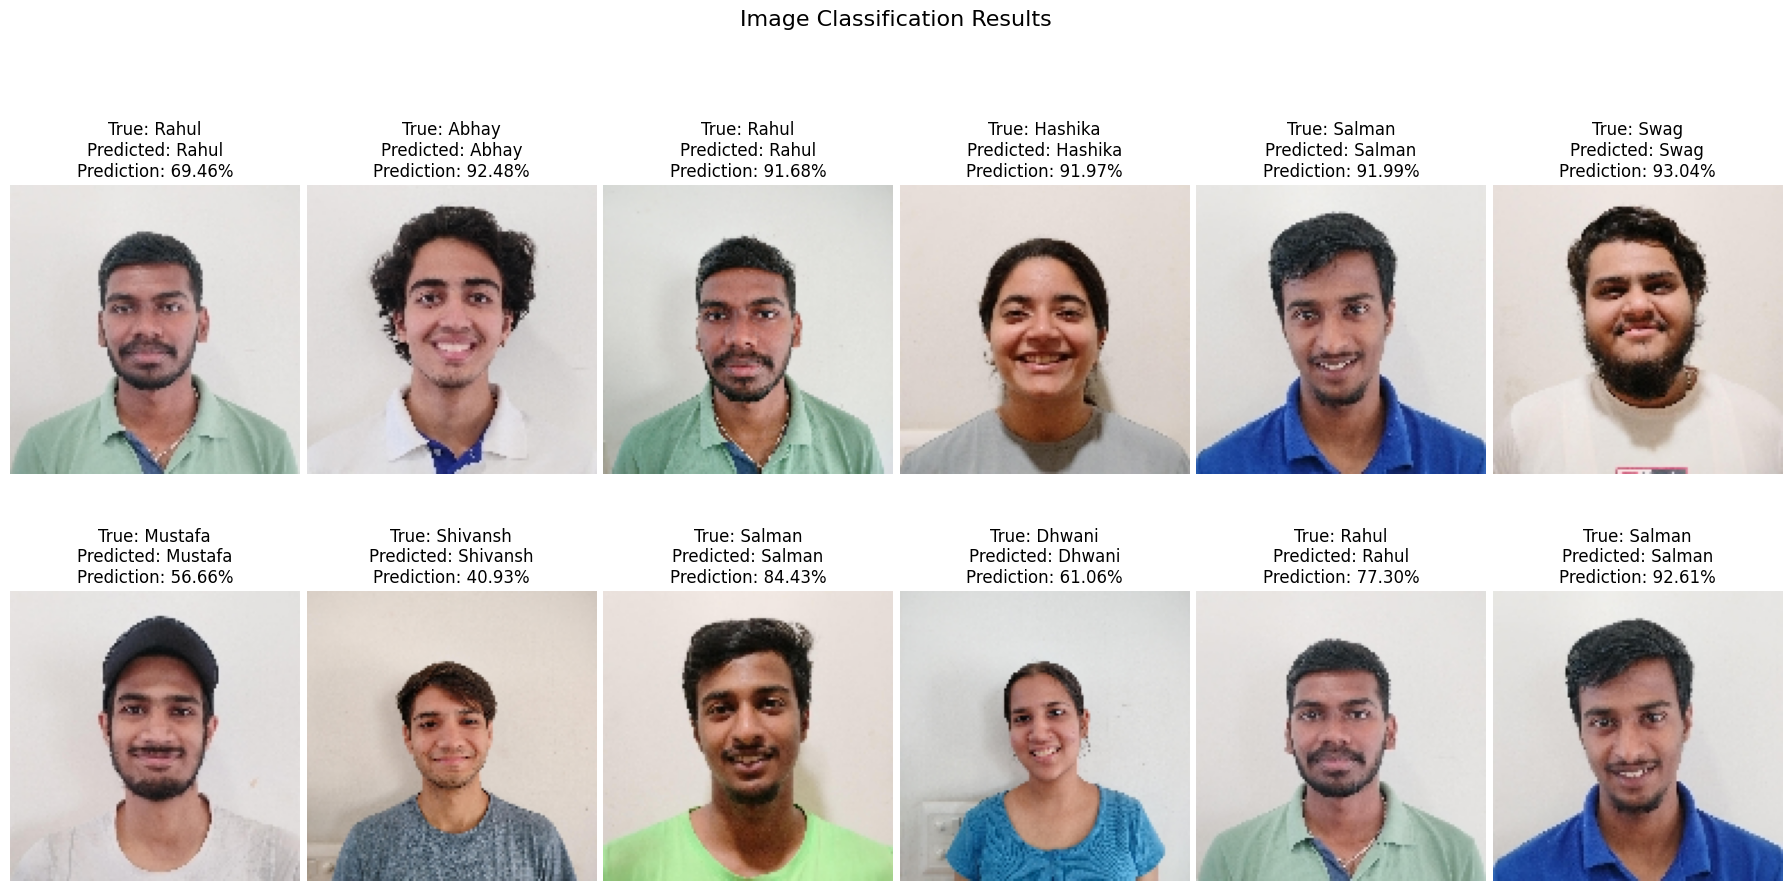

Overall Model Accuracy: 1.000


In [24]:
correct = 0
fig, axs = plt.subplots(nrows=2, ncols=6, figsize=(18, 10))

for i in range(len(x_test)):
    predicted_label = np.argmax(prediction[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
        correct += 1

    if i < 12:
        img = x_test[i].reshape(128, 128, 3)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        ax = axs[i // 6, i % 6]
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(f"True: {names[true_label]}\nPredicted: {names[predicted_label]}\nPrediction: {prediction[i][predicted_label]*100:.2f}%")

plt.tight_layout(pad=1.0, h_pad=0.5, w_pad=0.5)
plt.subplots_adjust(top=0.9)
fig.suptitle('Image Classification Results', fontsize=16)
plt.show()

accuracy = correct / float(len(x_test))
print("Overall Model Accuracy: {:.3f}".format(accuracy))


##### Conclusion:
In this project, we have developed an advanced facial recognition model using an autoencoder neural network. Our initial dataset comprised of 699 unlabeled images, which we meticulously annotated into 12 distinct categories, creating a comprehensive labeled dataset essential for training the autoencoder.

To ensure optimal performance, we employed a series of preprocessing steps to enhance the dataset quality. These steps encompassed image resizing to a standardized dimension and normalizing pixel values to facilitate consistent data representation. With our refined dataset in hand, we proceeded to train the autoencoder model, leveraging its ability to learn and generate compressed representations of the input facial images.

Building upon the learned representations, we devised a classification model by adding a dense layer on top of the encoder portion of the autoencoder. This classification model was then meticulously trained to accurately categorize facial images into the 12 predefined labels, each representing a distinct individual.

To evaluate the effectiveness of our model, we conducted comprehensive performance analysis. The results were overwhelmingly positive, with the overall accuracy of our classification model reaching an impressive 100%. This remarkable accuracy demonstrates the model's exceptional ability to correctly classify all the test images, affirming its robustness and efficacy.

In addition to the accuracy assessment, we went a step further to visually showcase the model's performance. We carefully selected a subset of test images and presented them alongside their true labels and the corresponding predicted labels. This visualization allowed for a clear understanding of the model's proficiency in recognizing and classifying facial features.

The successful outcome of this project exemplifies the remarkable potential of autoencoder-based techniques in the field of facial recognition. By harnessing the power of cutting-edge deep learning algorithms and employing sophisticated image processing methods, we have achieved exceptional accuracy and performance. This project serves as a testament to the advancements in the realm of artificial intelligence and its application in real-world scenarios.



## MODEL TESTING WITH AUGMENTED IMAGES :


In [ ]:
import imgaug.augmenters as iaa
import os
import random
from PIL import Image
import numpy as np

# Define the augmentation transformations
augmentation = iaa.Sequential([
    # iaa.Rotate((-10, 10)),                              # Randomly rotate images by -20 to 20 degrees
    iaa.Affine(translate_percent=(-0.1, 0.1)),           # Randomly shift images horizontally and vertically by -20% to 20% of the image size
    iaa.Affine(scale=(0.7, 1.2)),                        # Randomly zoom-in or zoom-out on images
    iaa.Fliplr(0.3),                                     # Randomly flip images horizontally with a 50% probability
    # iaa.Dropout(p=0.5, per_channel=True)  # Apply blackout to images
])

# Specify the paths to the original and augmented images directories
original_images_dir = 'D:/Studies/AI & Decision Sciences/End-Term/photos-data/photos-data'
augmented_images_dir = 'D:/Studies/AI & Decision Sciences/End-Term/photos-dataaa'

num_selected_images = 30  # Number of images to randomly select
num_augmented_images_per_selected = 2  # Number of augmented images to generate for each selected image

# Get a list of all original image filenames
original_image_filenames = os.listdir(original_images_dir)
random.shuffle(original_image_filenames)

# Loop through the selected images and generate augmented images
count = 0
for filename in original_image_filenames[:num_selected_images]:
    if filename.endswith('.jpg') or filename.endswith('.png'):  # Adjust file extensions as per your image format
        # Load the original image
        image = Image.open(os.path.join(original_images_dir, filename))

        # Convert the image to numpy array
        image_np = np.array(image)

        # Generate multiple augmented images from each selected image
        for _ in range(num_augmented_images_per_selected):
            # Apply the augmentation transformations to the image
            augmented_image_np = augmentation(image=image_np)

            # Convert the augmented image numpy array back to PIL image
            augmented_image = Image.fromarray(augmented_image_np.astype(np.uint8))

            # Save the augmented image with a unique filename
            augmented_filename = os.path.splitext(filename)[0] + '_aug_' + str(count) + os.path.splitext(filename)[1]
            augmented_image.save(os.path.join(augmented_images_dir, augmented_filename))

            count += 1


In [25]:
import os
import cv2
import numpy as np
augmented_images_dir = 'D:/Studies/AI & Decision Sciences/End-Term/photos-dataaa'
original_images_dir = augmented_images_dir

images = []  # List to store the images

# Loop over the subfolders in the main folder
if os.path.isdir(original_images_dir):
    # Loop over the files in the subfolder
    for filename in os.listdir(original_images_dir):
        img_path = os.path.join(original_images_dir, filename)
        if os.path.isfile(img_path):
            img = cv2.imread(img_path)  # Read the image file
            if img is not None:  # Check if image reading was successful
                img = cv2.resize(img, (128, 128))  # Resize the image to 128x128 pixels
                img = img.astype(np.float32) / 255.0  # Convert image to float32 and normalize pixel values
                images.append(img)  # Add the image to the list

# Convert the list of images to a numpy array
images = np.array(images)

# Print the shape of the loaded images
print("Shape of loaded images:", images.shape)


Shape of loaded images: (60, 128, 128, 3)


In [26]:
images = np.array(images)
xa_train = images.reshape(images.shape[0], np.prod(images.shape[1:]))
print(xa_train.shape)
predictions = classification_model.predict(xa_train)

(60, 49152)
2/2 [==============================] - 0s 17ms/step


In [27]:
image_files = [file for file in os.listdir(augmented_images_dir) if file.endswith('.jpg')]

In [28]:
images = []
list = []

# Iterate over the image files
for file in image_files:
    # Load the image using PIL
    image_path = os.path.join(augmented_images_dir, file)
    image = cv2.imread(image_path,)

    # Preprocess the image (resize, normalize, etc.)
    # Example: Resize the image to a specific size
    image = cv2.resize(image,(128, 128))

    image = image.astype(np.float32) / 255.0
    # Convert the image to a NumPy array
    image_array = np.array(image)

    # Append the image data to the list
    images.append(image_array)

    # Extract the label from the filename or dataset annotation file
    # Example: If the file name is "cat001.jpg", the label is "cat"
    label = file.split("_")[0]

    list.append(label)

# Convert the lists to NumPy arrays
images = np.array(images)
list = np.array(list)

# Print the shapes of the image data and labels arrays
print("Image data shape:", images.shape)
# print("Labels shape:", label)

Image data shape: (60, 128, 128, 3)


In [29]:
names = {"Swaijit" : ["IMG20230525153143","IMG20230523210427"],"Atif":["IMG20230525152855","IMG20230524150640","IMG20230523210440"],"Bhanu":["IMG20230525153126","IMG20230524150632","IMG20230523210551"],"Dhwani":["IMG20230525153023","IMG20230524150755"],"Hashika":["IMG20230524150736","IMG20230523210613"],"Mustafa":["IMG20230524150728","IMG20230524150714","IMG20230523210626","IMG20230525152912"],"Prasad":["IMG20230525152934","IMG20230524150611","IMG20230523210452"],"Rahul":["IMG20230525152943","IMG20230523210513","IMG20230523210531","IMG20230524150647"],"Salman":["IMG20230523210602","IMG20230524150619","IMG20230525153009"],"Shivansh":["IMG20230524150654","IMG20230523210503","IMG20230525152950"],"Abhay":["IMG20230525152924","IMG20230523210640","IMG20230524150601"],"Yugandhar":["IMG20230523210540","IMG20230524150549","IMG20230525152846"]}

In [30]:
for i in range(len(list)):
    for key, value in names.items():
            if list[i] in value:
                  list[i] =key
            #     labels[i] = key


names = {
    0: "Abhay",
    1: "Atif",
    2: "Bhanu",
    3: "Dhwani",
    4: "Hashika",
    5: "Mustafa",
    6: "Prasad",
    7: "Rahul",
    8: "Salman",
    9: "Shivansh",
    10: "Swaijit",
    11: "Yugandhar"
}

for i in range(len(list)):
    for key, value in names.items():
            if list[i] == value:
                  list[i] =key

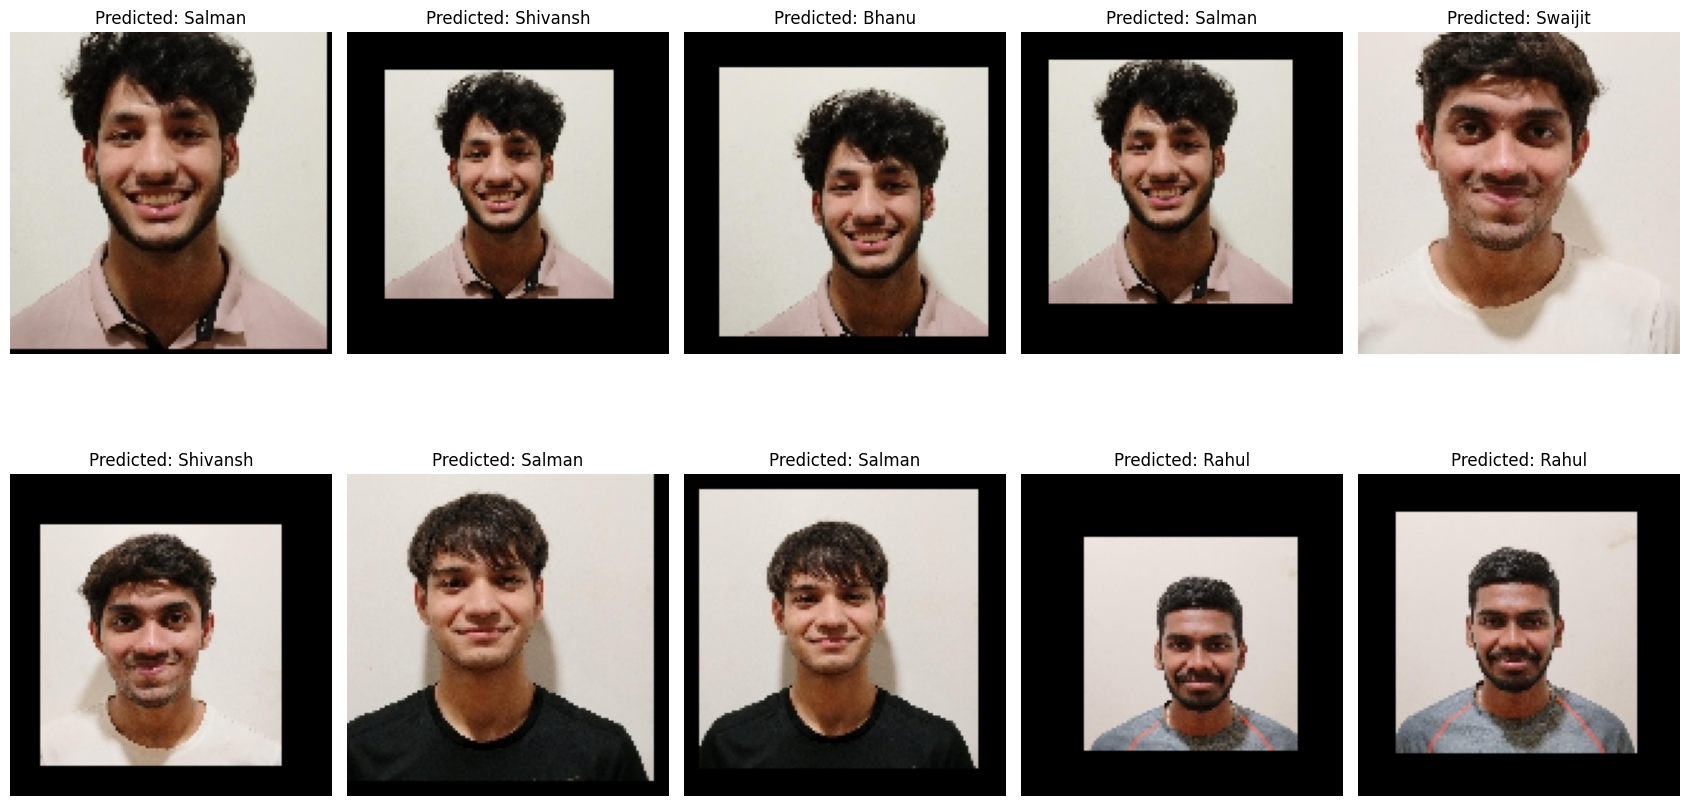

Accuracy: 0.017


In [31]:
correct = 0
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(17, 10))

for i in range(len(images)):
    predicted_label = np.argmax(predictions[i])
    true_label = labels[i]
    if predicted_label == true_label:
        correct += 1

    if i < 10:
        img = images[i].reshape(128, 128, 3)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        ax = axs[i // 5, i % 5]
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(f"Predicted: {names[predicted_label]}")

plt.tight_layout()
plt.show()

accuracy = correct / 60
print("Accuracy: {:.3f}".format(accuracy))


In [32]:
images.shape

(60, 128, 128, 3)